# **Project Name : Titanic**

# **Target Prediction**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Check the shape of table
df.shape

# Check the data type of columns
df.dtypes

# Check total null values in columns
df.isnull().sum()

# Remove unwanted columns (who,deck,alive)
df.drop(columns=["who","deck","alive"],inplace=True)

# Fill the null values
df["age"].fillna(df["age"].mean(),inplace=True)                        # Mean is used for numerical data
df["embarked"].fillna(df["embarked"].mode(),inplace=True)              # Mode is used for text data
df["embark_town"].fillna(df["embark_town"].mode(),inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True


In [ ]:
# How to encode the text
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [ ]:
for i in df:
  if df[i].dtypes in (object,"category"):
    df[i] = label.fit_transform(df[i])

print("Done")

Done


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,2,True,2,False
1,1,1,0,38.0,1,0,71.2833,0,0,False,0,False
2,1,3,0,26.0,0,0,7.9250,2,2,False,2,True
3,1,1,0,35.0,1,0,53.1000,2,0,False,2,False
4,0,3,1,35.0,0,0,8.0500,2,2,True,2,True


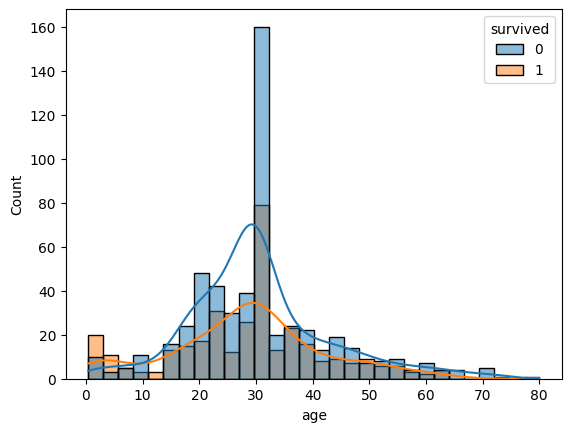

In [ ]:
# Find out the maximum age of people who survived with a graph
sns.histplot(data=df,x="age",hue="survived",kde=True)
plt.show()

In [ ]:
df.sample(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
804,1,3,1,27.000000,0,0,6.975,2,2,True,2,True
598,0,3,1,29.699118,0,0,7.225,0,2,True,0,True
487,0,1,1,58.000000,0,0,29.700,0,0,True,0,True
464,0,3,1,29.699118,0,0,8.050,2,2,True,2,True


In [ ]:
# Extract Features and Target
x = df.drop(columns=["survived"])
y = df["survived"]

In [ ]:
# Divide data for Training and Testing
from sklearn.model_selection import train_test_split

In [ ]:
# Build Machine Learning Model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Predict with test data
pred = log.predict(x_test)
print(pred)

[1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1
 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0]


In [ ]:
# Check the Accuracy or Performance of the model
ac = log.score(x_train,y_train)           # Show the accuracy of training
print(ac)

ac2 = log.score(x_test,y_test)             # Show the accuracy of testing data
print(ac2)

0.8258426966292135
0.8100558659217877


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix